### OPERATORNORM WITHOUT ADJOINT 

- Creator:  Jonas Bresch, M.Sc
- Date: August 12rd, 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import imp

In [3]:
import adjointfreenorm

### DATA

In [6]:
#
# random matrix
#

A = np.random.randn(1000,500)

In [7]:
#
# random orthogonal matrix
#

n = 100
H = np.random.randn(n, n)
Q, R = scipy.linalg.qr(H)
A = Q.dot(Q.T)

In [8]:
#
# special matrices
#

A = [1,1,0,0]
A = np.diag(A)

In [9]:
#
# marix with singular values 1/n**2
#

A = np.zeros((1000,1000))
d = np.size(A[0,:])
for i in range(d):
    #A[d-1-i,d-1-i] = 1 - 1/int(i+1)
    A[i,i] = 1 - 1/int(i+1)

### SETTING

In [11]:
#
# creating upper bounds and actual largest singular vector
#

valsol = np.max(np.linalg.eigh(np.transpose(A)@A)[0])
valsolmin = np.min(np.linalg.eigh(np.transpose(A)@A)[0])

In [27]:
vv, optvv, vvval, listtau, lista, listerror = adjointfreenorm.MatFreeAdjNorm(A, 100001, 0, 10, 1)

iter. 	| func-value 	| res.  	| tau  		| alpha 	| beta  	| h^(1)(tau) 	| h^(2)(tau) 	| sample 	| error
------------------------------------------------------------------------------------------------------------------------------------------------------
0 	|  9.873e-01 	|  1.071e-02 	| -1.188e-01 	| -4.407e-04 	| -3.657e-03 	|  3.795e-19 	| -3.762e-03 	| 1 	| 0 	|  1.182e-01


1000 	|  9.964e-01 	|  1.619e-03 	|  2.184e-04 	|  2.579e-06 	| -1.181e-02 	|  1.170e-15 	| -1.181e-02 	| 1 	| 0 	|  2.184e-04
2000 	|  9.969e-01 	|  1.105e-03 	| -5.206e-03 	| -4.287e-05 	| -8.235e-03 	| -4.592e-17 	| -8.235e-03 	| 1 	| 0 	|  5.206e-03
3000 	|  9.972e-01 	|  8.508e-04 	|  9.114e-03 	|  6.796e-05 	| -7.456e-03 	|  2.365e-17 	| -7.458e-03 	| 1 	| 0 	|  9.114e-03
4000 	|  9.973e-01 	|  7.177e-04 	|  1.962e-03 	|  1.742e-05 	| -8.880e-03 	| -4.409e-17 	| -8.880e-03 	| 1 	| 0 	|  1.962e-03
5000 	|  9.974e-01 	|  6.279e-04 	| -3.008e-04 	| -3.889e-06 	| -1.293e-02 	| -4.917e-16 	| -1.293e-02 	| 1 	| 0 	|  3.008e-04
6000 	|  9.974e-01 	|  5.620e-04 	| -8.988e-04 	| -1.759e-05 	| -1.957e-02 	| -2.707e-16 	| -1.957e-02 	| 1 	| 0 	|  8.988e-04
7000 	|  9.975e-01 	|  5.079e-04 	|  9.967e-04 	|  9.106e-06 	| -9.136e-03 	| -5.636e-18 	| -9.136e-03 	| 1 	| 0 	|  9.967e-04
8000 	|  9.975e-01 	|  4.628e-04 	|  8.377e-04 	|  8.979e-06 	| -1.072e-02 	|  6.360e-17 	| -1.072e-02 	| 1 	| 

<Figure size 640x480 with 0 Axes>

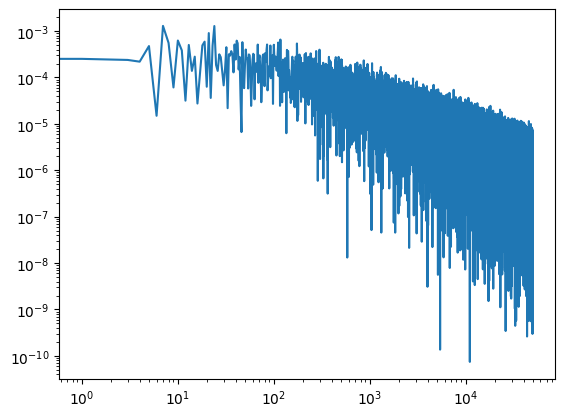

In [28]:
plt.plot(np.abs(lista))
plt.yscale('log')
plt.xscale('log')

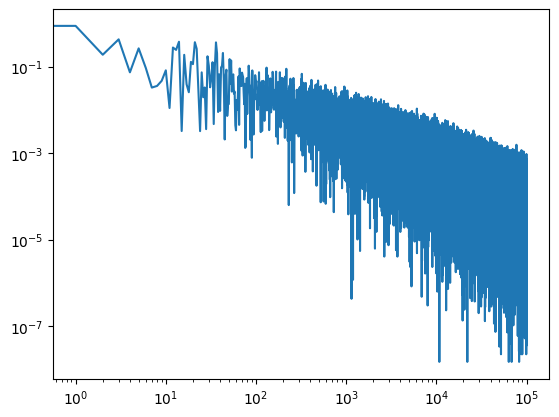

In [29]:
plt.plot(np.abs(listtau))
plt.yscale('log')
plt.xscale('log')

In [30]:
np.max(vvval) - valsol, np.linalg.norm(A@optvv)**2 - valsol

(-7.550838313485908e-05, -7.550838313485908e-05)

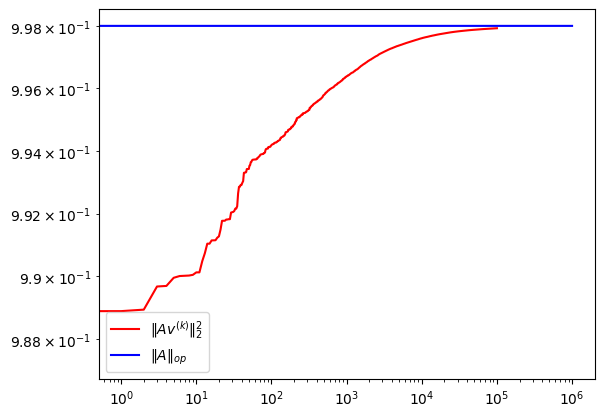

In [31]:
line1, = plt.plot(np.where(vvval == 0, np.max(vvval),vvval), 'r', label='$\|A v^{(k)}\|_2^2$')
line2, = plt.plot(valsol*np.ones(1000000), 'b', label='$\|A\|_{op}$')
plt.legend(handles=[line1, line2])
plt.xscale('log')
plt.yscale('log')

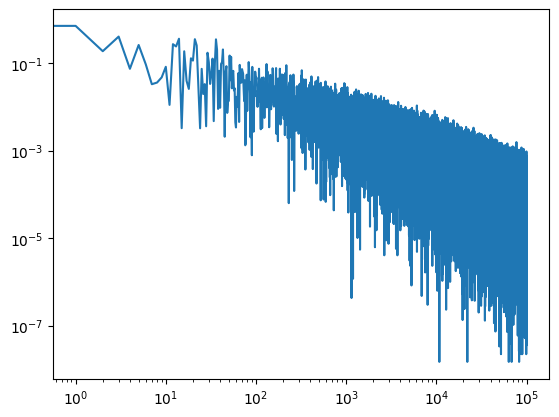

In [32]:
plt.plot(listerror)
plt.yscale('log')
plt.xscale('log')